In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('/kaggle/input/student-dropout-analysis-and-prediction-dataset/student dropout.csv')

In [6]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [7]:
df.shape

(649, 34)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [9]:
df.isnull().sum().sort_values(ascending=True)

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

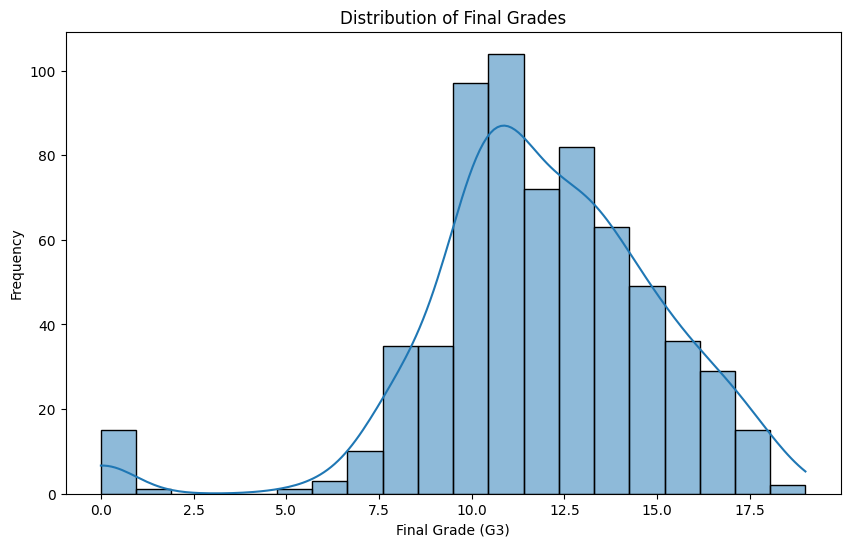

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Grade'], bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()


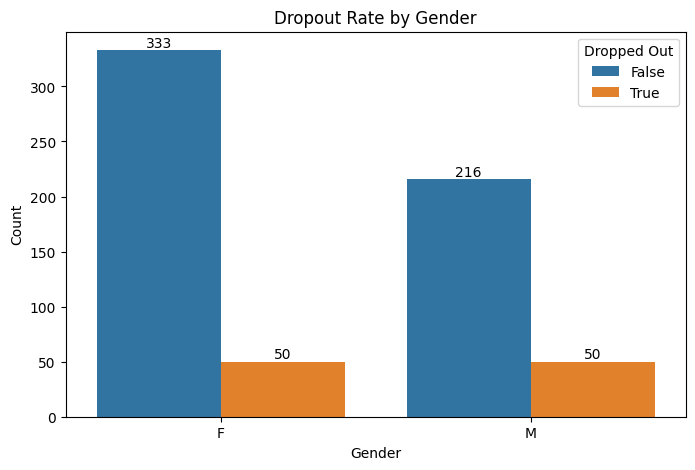

In [12]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Dropped_Out', ax=ax)

# Set the title and labels
ax.set_title('Dropout Rate by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Adjust the legend title
ax.legend(title='Dropped Out')

# Show the plot
plt.show()


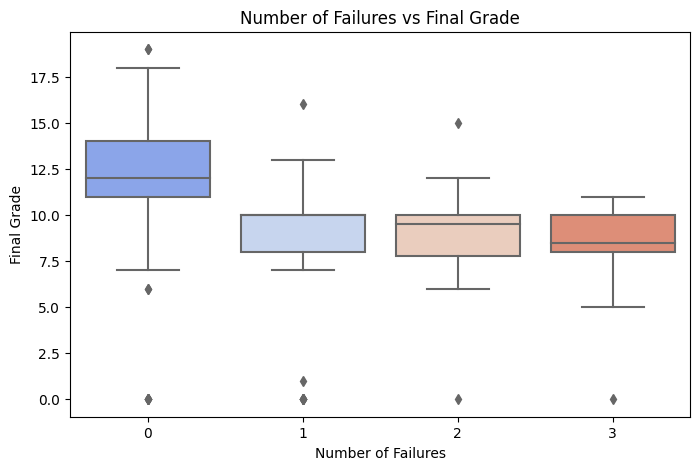

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Number_of_Failures', y='Final_Grade', palette='coolwarm')
plt.title('Number of Failures vs Final Grade')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade')
plt.show()


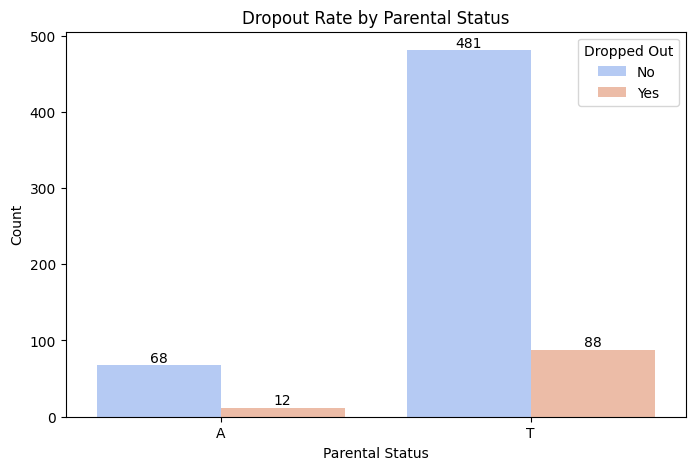

In [14]:
# Create the countplot and assign it to ax
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Parental_Status', hue='Dropped_Out', palette='coolwarm')

# Set plot title and labels
plt.title('Dropout Rate by Parental Status')
plt.xlabel('Parental Status')
plt.ylabel('Count')
plt.legend(title='Dropped Out', labels=['No', 'Yes'])

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Display the plot
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
#encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
encoder=LabelEncoder()

df[categorical_cols]=encoder.fit_transform(categorical_cols)


In [17]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,14,7,18,0,4,12,4,4,11,6,...,3,4,1,1,3,4,0,11,11,False
1,14,7,17,0,4,12,1,1,11,6,...,3,3,1,1,3,2,9,11,11,False
2,14,7,15,0,4,12,1,1,11,6,...,3,2,2,3,3,6,12,13,12,False
3,14,7,15,0,4,12,4,2,11,6,...,2,2,1,1,5,0,14,14,14,False
4,14,7,16,0,4,12,3,3,11,6,...,3,2,1,2,5,0,11,13,13,False


In [18]:
# Define features and target
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out']


In [19]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Initialize the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15


I0000 00:00:1763810213.309601     121 service.cc:145] XLA service 0x787f5c005830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763810213.309653     121 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763810213.309660     121 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/12 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.8750 - loss: 0.5126

I0000 00:00:1763810214.758731     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.8427 - loss: 0.4851 - val_accuracy: 0.8571 - val_loss: 0.3419
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.3725 - val_accuracy: 0.8681 - val_loss: 0.2932
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9064 - loss: 0.2210 - val_accuracy: 0.8901 - val_loss: 0.2349
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9079 - loss: 0.1956 - val_accuracy: 0.8681 - val_loss: 0.2787
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9026 - loss: 0.2106 - val_accuracy: 0.9011 - val_loss: 0.1970
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1426 - val_accuracy: 0.9341 - val_loss: 0.1855
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9565 - loss: 0.1282 - val_accuracy: 0.9011 - val_loss: 0.2113
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9423 - loss: 0.1190 - val_accuracy: 0.8901 - val_loss: 0.2352
E

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy: {test_accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1016 
Accuracy: 0.9487179517745972


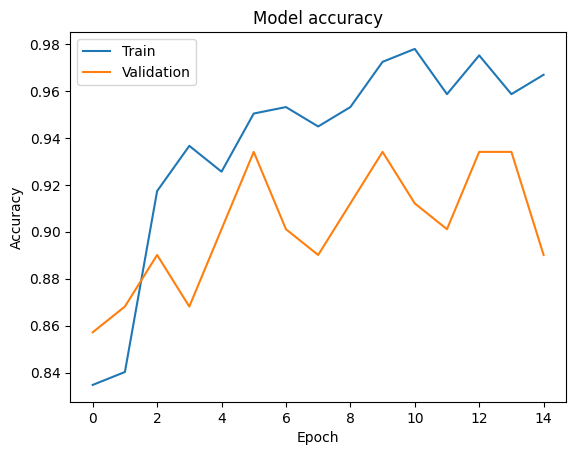

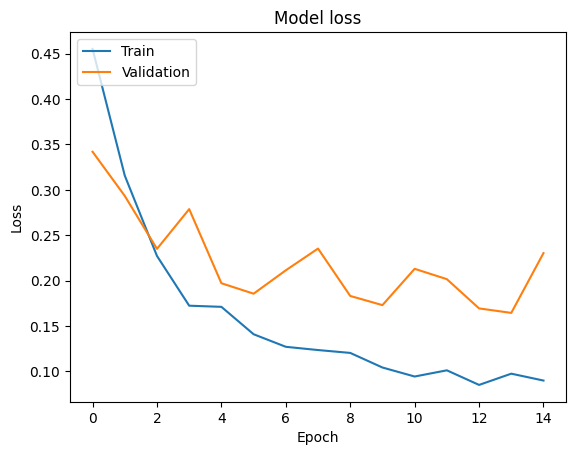

In [24]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
